In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv('campeonato-brasileiro-cartoes.csv')

In [4]:
df2 = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')

In [5]:

df3 = pd.read_csv('campeonato-brasileiro-full.csv')

In [6]:
df4 = pd.read_csv('campeonato-brasileiro-gols.csv')

### Identificando os valores ausentes no dataset

In [7]:
df1.isnull().sum()

partida_id       0
rodata           0
clube            0
cartao           0
atleta           6
num_camisa     386
posicao       1198
minuto           0
dtype: int64



Se precisar de ajuda para implementar ou ajustar essas estratégias, é só avisar!

In [8]:
df2.isnull().sum()

partida_id             0
rodata                 0
clube                  0
chutes                 0
chutes_no_alvo         0
posse_de_bola       9990
passes                 0
precisao_passes    12298
faltas                 0
cartao_amarelo         0
cartao_vermelho        0
impedimentos           0
escanteios             0
dtype: int64

In [9]:
df3.isnull().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [10]:
df4.isnull().sum()

partida_id        0
rodata            0
clube             0
atleta            0
minuto            0
tipo_de_gol    7843
dtype: int64

### Verificando em qual tempo de jogo há mais incidência de cartões amarelos e vermelhos.

In [11]:
# Função para converter o formato '90+4' em um inteiro somado
def converter_minuto(minuto):
    if '+' in str(minuto):
        partes = minuto.split('+')
        return int(partes[0]) + int(partes[1])
    return int(minuto)

# Aplicando a função na coluna 'minuto'
df1['minuto'] = df1['minuto'].apply(converter_minuto)

In [12]:
df1['intervalo_minutos'] = pd.cut(df1['minuto'], bins=range(0, 101, 10), right=False)

In [13]:
# Contando os cartões amarelos e vermelhos por intervalo
cartoes_por_intervalo = df1.groupby(['intervalo_minutos', 'cartao']).size().unstack(fill_value=0)

# Renomeando as colunas para facilitar a leitura
cartoes_por_intervalo.rename(columns={'Amarelo': 'Cartões Amarelos', 'Vermelho': 'Cartões Vermelhos'}, inplace=True)

C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_4884\103233692.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cartoes_por_intervalo = df1.groupby(['intervalo_minutos', 'cartao']).size().unstack(fill_value=0)


In [14]:
cartoes_por_intervalo

cartao,Cartões Amarelos,Cartões Vermelhos
intervalo_minutos,,
"[0, 10)",399,13
"[10, 20)",949,19
"[20, 30)",1374,30
"[30, 40)",1825,40
"[40, 50)",2326,79
"[50, 60)",1943,85
"[60, 70)",2072,106
"[70, 80)",2306,129
"[80, 90)",2608,184


Analisando os dados apresentados, podemos elaborar algumas hipóteses sobre a distribuição de cartões ao longo da partida:

1. Início do Jogo (0-30 minutos):

- Nós podemos observar uma quantidade menor de cartões no começo da partida (0-10 minutos: 399 amarelos e 13 vermelhos)
- Hipótese: Os árbitros tendem a ser mais tolerantes no início do jogo, buscando não influenciar o andamento da partida prematuramente
- A progressão gradual (399 → 949 → 1374 amarelos) sugere um aumento na intensidade do jogo

2. Meio do Primeiro Tempo (30-45 minutos):

- Aumento significativo de cartões amarelos (1825 e 2326)
- Hipótese: O desgaste físico começa a aparecer e a disputa pela vantagem antes do intervalo intensifica as faltas

3. Início do Segundo Tempo (45-60 minutos):

- Leve redução nos cartões (1943 amarelos)
- Hipótese: Times voltam mais cautelosos do intervalo e jogadores já advertidos moderam suas ações

4. Final do Jogo (70-90 minutos):

- Pico de cartões amarelos (2306 → 2608)
- Aumento expressivo de cartões vermelhos (129 → 184)
- Hipóteses:
    - O cansaço físico leva a mais faltas por erro de timing
    - Times perdendo arriscam mais e cometem mais faltas táticas
    - Acúmulo de cartões amarelos leva a mais expulsões
    - Jogadas mais desesperadas para manter/buscar resultado

5. Tempo Adicional (90-100 minutos):

- Grande número de cartões vermelhos (263, maior quantidade)
- Hipótese: Combinação de:
    - Frustração ao final da partida
    - Confrontos mais acalorados em momentos decisivos
    - Faltas para parar contra-ataques em momentos de desespero
    - Reclamações mais intensas com a arbitragem

Padrões Gerais:

- Nós podemos notar uma clara progressão na quantidade de cartões ao longo do jogo
- A proporção de cartões vermelhos em relação aos amarelos aumenta significativamente no final
- O momento com menor número de punições é o início da partida
- O período entre 80-90 minutos apresenta o maior número de cartões amarelos
- O tempo adicional tem a maior incidência de cartões vermelhos

### Contando quantas vezesum jogador marcou gol e levou cartão vermelho.

In [15]:
df1[['cartao', 'atleta', 'minuto']]

,cartao,atleta,minuto
0,Amarelo,Paulo Roberto da Silva,66
1,Amarelo,Thiago Heleno,44
2,Amarelo,Andrés D'Alessandro,72
3,Amarelo,Marcelo Machado dos Santos,86
4,Amarelo,Mansur,10
...,...,...,...
18852,Amarelo,Gabriel Pec,95
18853,Amarelo,Paulinho,51
18854,Amarelo,Gary Medel,84
18855,Amarelo,Eduardo Sasha,17


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18857 entries, 0 to 18856
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   partida_id         18857 non-null  int64   
 1   rodata             18857 non-null  int64   
 2   clube              18857 non-null  object  
 3   cartao             18857 non-null  object  
 4   atleta             18851 non-null  object  
 5   num_camisa         18471 non-null  float64 
 6   posicao            17659 non-null  object  
 7   minuto             18857 non-null  int64   
 8   intervalo_minutos  18794 non-null  category
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 1.2+ MB


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       16810 non-null  int64 
 1   rodata           16810 non-null  int64 
 2   clube            16810 non-null  object
 3   chutes           16810 non-null  int64 
 4   chutes_no_alvo   16810 non-null  int64 
 5   posse_de_bola    6820 non-null   object
 6   passes           16810 non-null  int64 
 7   precisao_passes  4512 non-null   object
 8   faltas           16810 non-null  int64 
 9   cartao_amarelo   16810 non-null  int64 
 10  cartao_vermelho  16810 non-null  int64 
 11  impedimentos     16810 non-null  int64 
 12  escanteios       16810 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.7+ MB


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8405 non-null   int64 
 1   rodata              8405 non-null   int64 
 2   data                8405 non-null   object
 3   hora                8405 non-null   object
 4   mandante            8405 non-null   object
 5   visitante           8405 non-null   object
 6   formacao_mandante   3431 non-null   object
 7   formacao_visitante  3431 non-null   object
 8   tecnico_mandante    3795 non-null   object
 9   tecnico_visitante   3795 non-null   object
 10  vencedor            8405 non-null   object
 11  arena               8405 non-null   object
 12  mandante_Placar     8405 non-null   int64 
 13  visitante_Placar    8405 non-null   int64 
 14  mandante_Estado     8405 non-null   object
 15  visitante_Estado    8405 non-null   object
dtypes: int64(4), object(12)


In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partida_id   8932 non-null   int64 
 1   rodata       8932 non-null   int64 
 2   clube        8932 non-null   object
 3   atleta       8932 non-null   object
 4   minuto       8932 non-null   object
 5   tipo_de_gol  1089 non-null   object
dtypes: int64(2), object(4)
memory usage: 418.8+ KB


### Analises univariadas

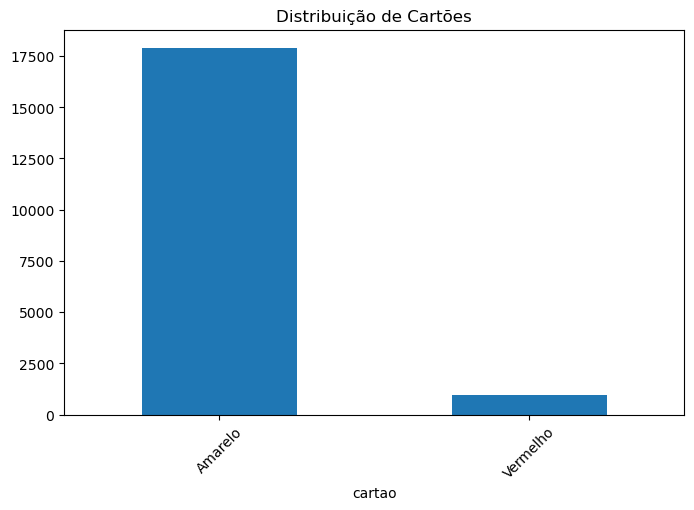

In [21]:
# Visualização
plt.figure(figsize=(8,5))
df1['cartao'].value_counts().plot(kind='bar')
plt.title('Distribuição de Cartões')
plt.xticks(rotation=45)
plt.show()

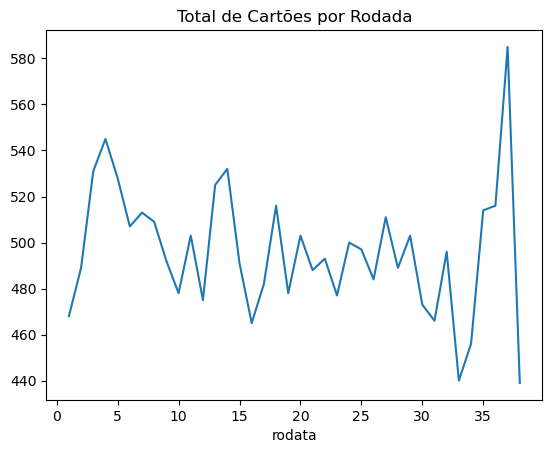

In [22]:
# Cartões por rodada
df1.groupby('rodata')['cartao'].count().plot()
plt.title('Total de Cartões por Rodada')
plt.show()

In [24]:
# Top 10 clubes com mais cartões
df1['clube'].value_counts().head(10)

clube
Fluminense       956
Sao Paulo        953
Santos           950
Internacional    938
Palmeiras        937
Athletico-PR     878
Atletico-MG      877
Flamengo         855
Gremio           835
Corinthians      788
Name: count, dtype: int64

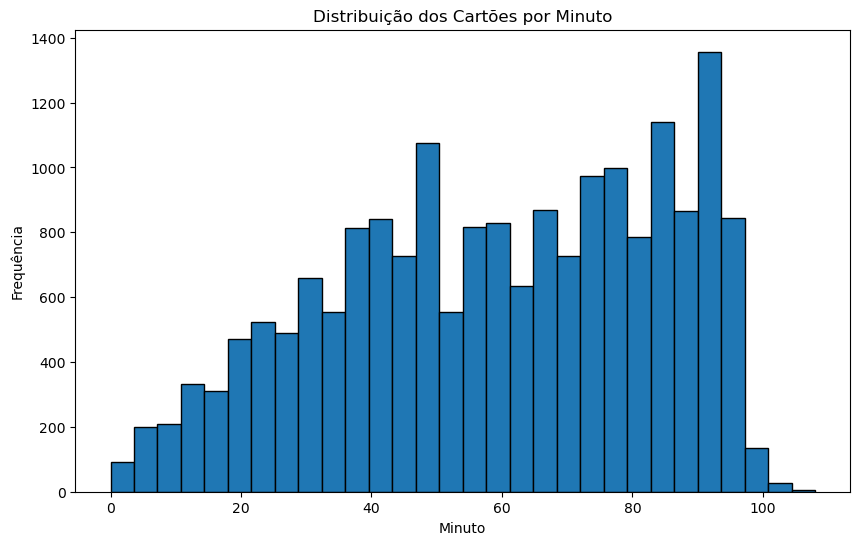

In [23]:
# Distribuição dos minutos dos cartões
plt.figure(figsize=(10,6))
plt.hist(df1['minuto'], bins=30, edgecolor='black')
plt.title('Distribuição dos Cartões por Minuto')
plt.xlabel('Minuto')
plt.ylabel('Frequência')
plt.show()

In [25]:
# Estatísticas dos minutos
df1['minuto'].describe()

count    18857.000000
mean        59.123880
std         24.961692
min          0.000000
25%         40.000000
50%         61.000000
75%         81.000000
max        108.000000
Name: minuto, dtype: float64

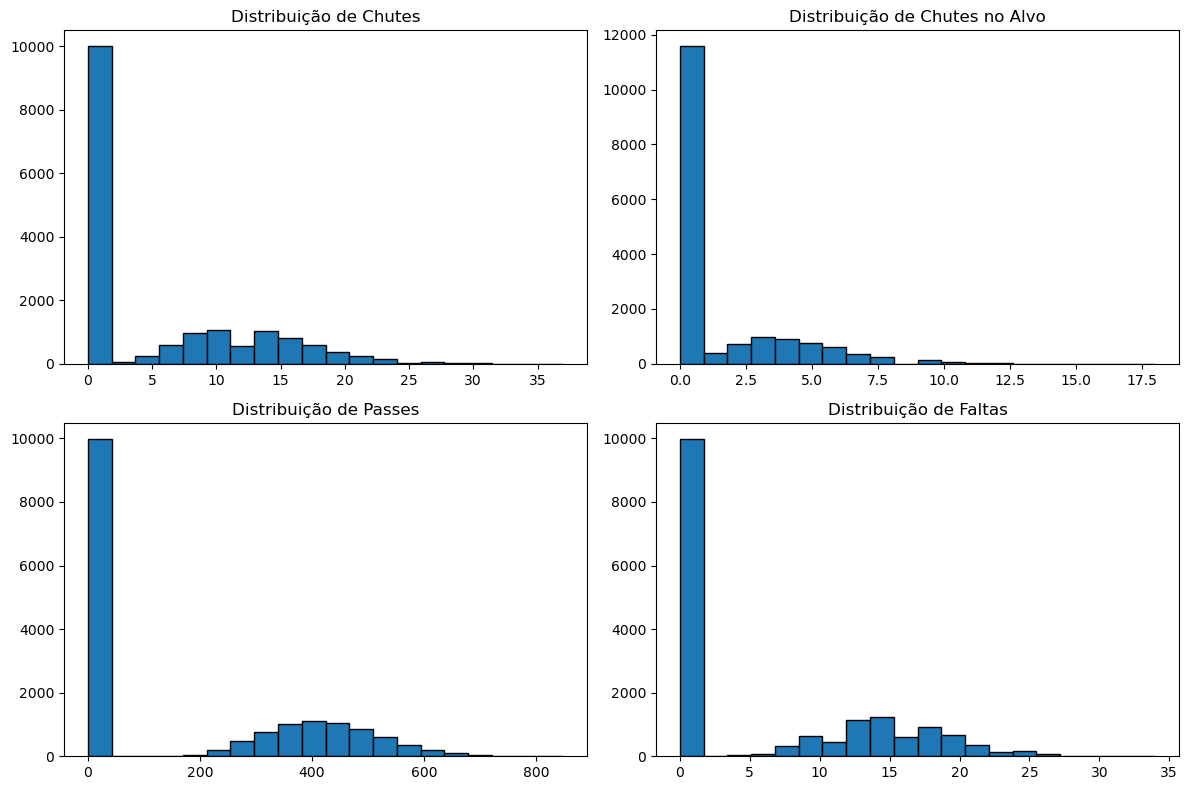

In [27]:
# Distribuição de chutes
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(df2['chutes'], bins=20, edgecolor='black')
plt.title('Distribuição de Chutes')

plt.subplot(2,2,2)
plt.hist(df2['chutes_no_alvo'], bins=20, edgecolor='black')
plt.title('Distribuição de Chutes no Alvo')

plt.subplot(2,2,3)
plt.hist(df2['passes'], bins=20, edgecolor='black')
plt.title('Distribuição de Passes')

plt.subplot(2,2,4)
plt.hist(df2['faltas'], bins=20, edgecolor='black')
plt.title('Distribuição de Faltas')

plt.tight_layout()
plt.show()

In [28]:
# Estatísticas descritivas das principais métricas
metricas = ['chutes', 'chutes_no_alvo', 'passes', 'faltas', 'cartao_amarelo', 'cartao_vermelho']
df2[metricas].describe()

,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000
mean,5.233432,1.359310,171.247234,6.069185,0.940393,0.051933
std,7.094100,2.387573,216.806317,7.877681,1.463057,0.242646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,2.000000,387.000000,13.000000,2.000000,0.000000
max,37.000000,18.000000,848.000000,34.000000,10.000000,3.000000


In [30]:
# Top clubes por diferentes métricas
print("Top 5 clubes - Média de Chutes:")
df2.groupby('clube')['chutes'].mean().sort_values(ascending=False).head()

Top 5 clubes - Média de Chutes:


clube
Bragantino     14.967105
Cuiaba         11.666667
America-MG     10.872807
Joinville      10.868421
Chapecoense    10.471698
Name: chutes, dtype: float64

In [31]:

print("Top 5 clubes - Média de Passes:")
df2.groupby('clube')['passes'].mean().sort_values(ascending=False).head()

Top 5 clubes - Média de Passes:


clube
Bragantino    421.453947
Cuiaba        377.824561
Joinville     349.631579
America-MG    319.750000
CSA           315.447368
Name: passes, dtype: float64

In [36]:
# Distribuição de vencedores
df3['vencedor'].value_counts()

vencedor
-                  2221
Sao Paulo           365
Flamengo            354
Santos              340
Internacional       339
Palmeiras           329
Atletico-MG         327
Corinthians         326
Fluminense          322
Gremio              316
Athletico-PR        309
Cruzeiro            304
Botafogo-RJ         247
Goias               209
Vasco               208
Coritiba            189
Figueirense         142
Sport               131
Bahia               127
Vitoria             123
Ponte Preta         114
Fortaleza           108
Juventude            85
Parana               83
Atletico-GO          72
Ceara                72
Chapecoense          70
Avai                 66
Sao Caetano          65
America-MG           58
Bragantino           55
Nautico              54
Criciuma             50
Paysandu             41
Guarani              36
Cuiaba               34
Portuguesa           31
Santa Cruz           15
Barueri              12
Santo Andre          11
Brasiliense          10
Ipating

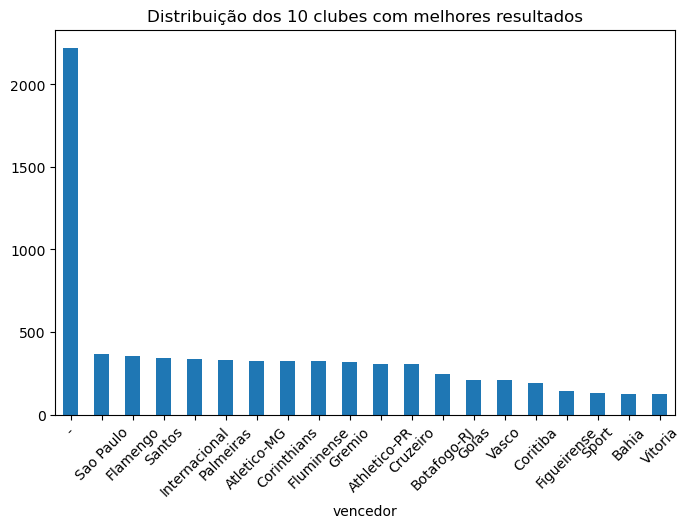

In [37]:
plt.figure(figsize=(8,5))
df3['vencedor'].value_counts().head(20).plot(kind='bar')
plt.title('Distribuição dos 10 clubes com melhores resultados')
plt.xticks(rotation=45)
plt.show()

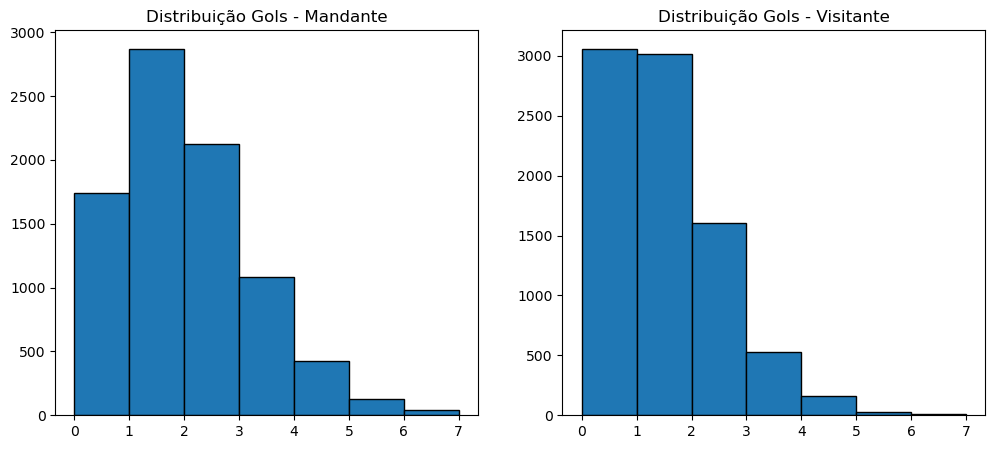

In [38]:
# Distribuição de placares
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df3['mandante_Placar'], bins=range(0,8), edgecolor='black')
plt.title('Distribuição Gols - Mandante')

plt.subplot(1,2,2)
plt.hist(df3['visitante_Placar'], bins=range(0,8), edgecolor='black')
plt.title('Distribuição Gols - Visitante')
plt.show()

In [40]:
# Top arenas com mais jogos
df3['arena'].value_counts().head(10)

arena
 Maracanã                   631
 Mineirão                   459
 Morumbi                    413
 Couto Pereira              295
 Serra Dourada              235
 Orlando Scarpelli          219
 Pacaembu                   213
Estádio Raimundo Sampaio    201
 Beira Rio                  200
 Vila Belmiro               192
Name: count, dtype: int64

In [ ]:
# Clubes que mais jogaram em casa
df3['mandante'].value_counts().head(10)

mandante
Sao Paulo        409
Santos           409
Fluminense       409
Flamengo         408
Internacional    390
Athletico-PR     390
Corinthians      390
Atletico-MG      390
Gremio           369
Palmeiras        367
Name: count, dtype: int64

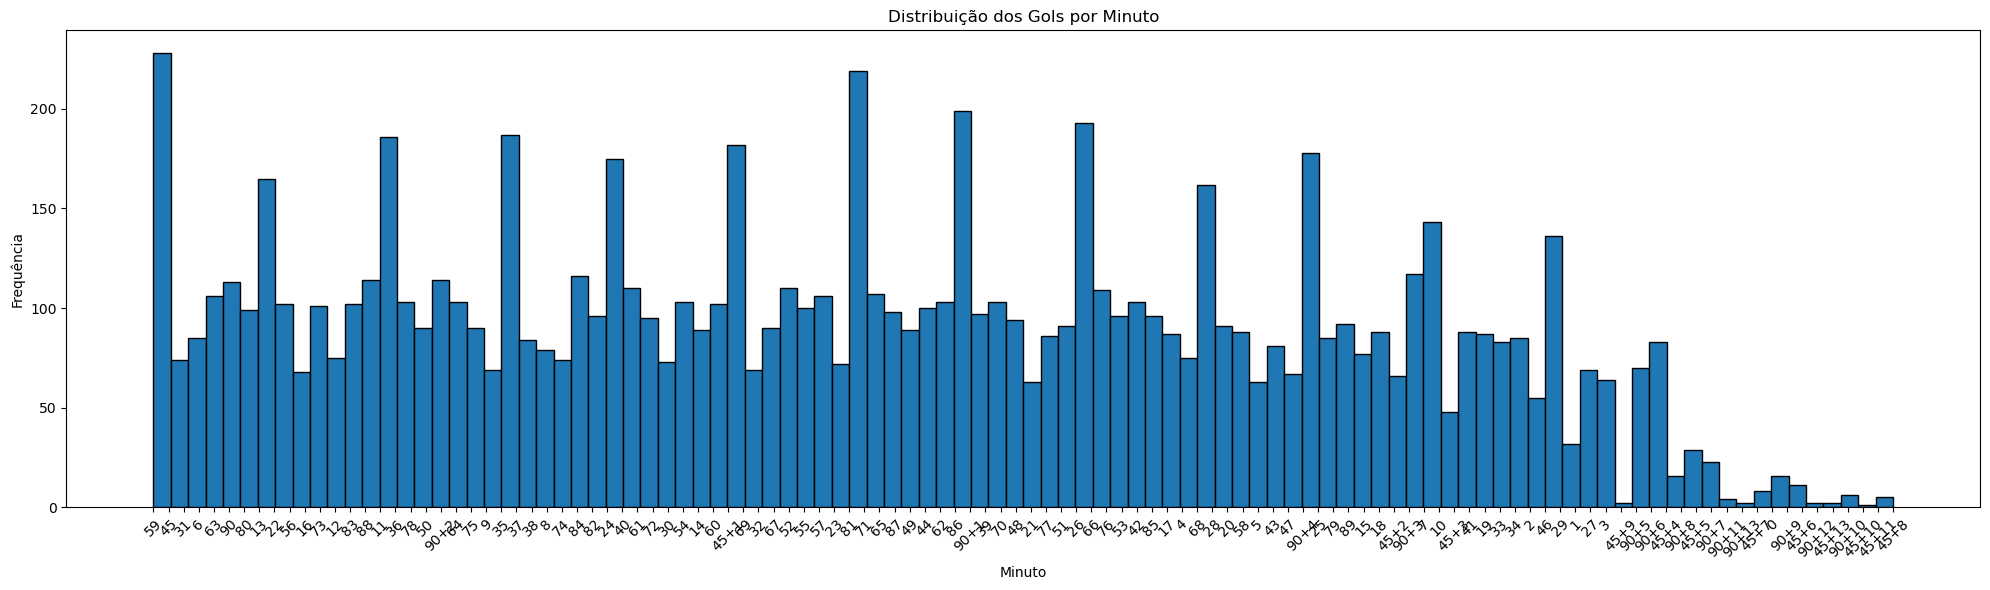

In [51]:
plt.figure(figsize=(20,6))
plt.hist(df4['minuto'].dropna(), bins=100, edgecolor='black')
plt.title('Distribuição dos Gols por Minuto')
plt.xticks(rotation=45)
plt.xlabel('Minuto')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [52]:
# Top artilheiros
df4['atleta'].value_counts().head(10)

atleta
Gabriel Barbosa              97
Fred                         81
Diego Souza                  80
Luciano da Rocha Neves       64
Bruno Henrique               61
Pedro                        61
Eduardo Pereira Rodrigues    56
Ricardo Oliveira             56
Willian Gomes de Siqueira    56
Giorgian De Arrascaeta       54
Name: count, dtype: int64

In [53]:
# Top clubes que mais marcaram
df4['clube'].value_counts().head(10)

clube
Flamengo         590
Palmeiras        581
Atletico-MG      558
Santos           478
Sao Paulo        474
Fluminense       473
Corinthians      470
Gremio           456
Athletico-PR     452
Internacional    431
Name: count, dtype: int64

In [ ]:
df4['tipo_de_gol'].value_counts()

tipo_de_gol
Penalty       859
Gol Contra    230
Name: count, dtype: int64

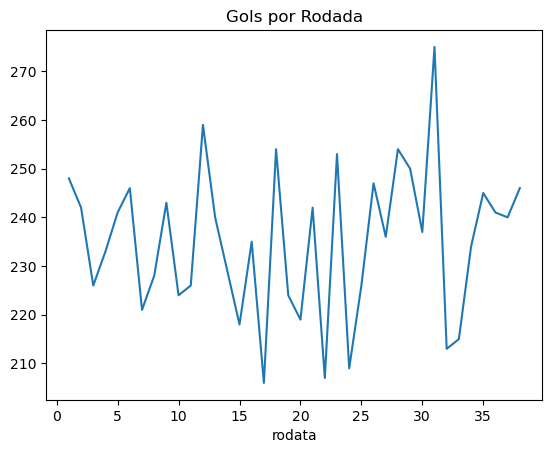

In [55]:
# Gols por rodada
df4.groupby('rodata').size().plot()
plt.title('Gols por Rodada')
plt.show()

### Analise bivariada

In [57]:
from scipy.stats import pearsonr

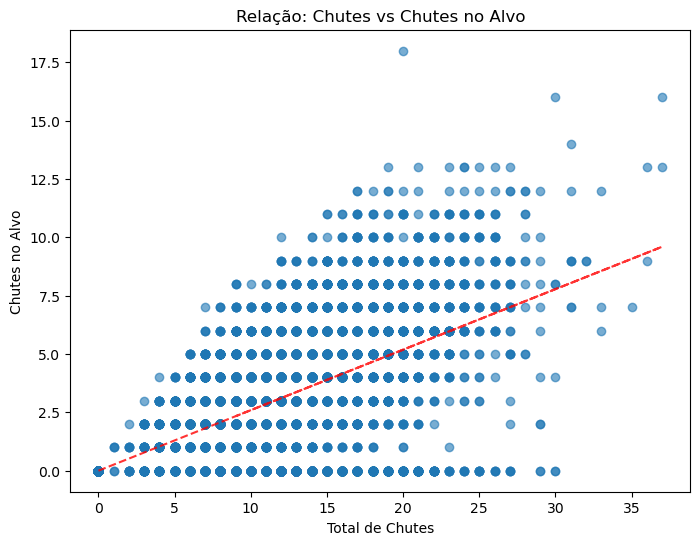

In [58]:
# Correlação entre chutes e chutes no alvo
plt.figure(figsize=(8,6))
plt.scatter(df2['chutes'], df2['chutes_no_alvo'], alpha=0.6)
plt.xlabel('Total de Chutes')
plt.ylabel('Chutes no Alvo')
plt.title('Relação: Chutes vs Chutes no Alvo')
# Linha de tendência
z = np.polyfit(df2['chutes'], df2['chutes_no_alvo'], 1)
p = np.poly1d(z)
plt.plot(df2['chutes'], p(df2['chutes']), "r--", alpha=0.8)
plt.show()

In [59]:
# Correlação numérica
corr_chutes = pearsonr(df2['chutes'], df2['chutes_no_alvo'])
print(f"Correlação Chutes vs Chutes no Alvo: {corr_chutes[0]:.3f}")

Correlação Chutes vs Chutes no Alvo: 0.771


In [60]:
# Eficiência de finalização por clube (top 10 com mais jogos)
clubes_freq = df2['clube'].value_counts().head(10).index
df2_top = df2[df2['clube'].isin(clubes_freq)]

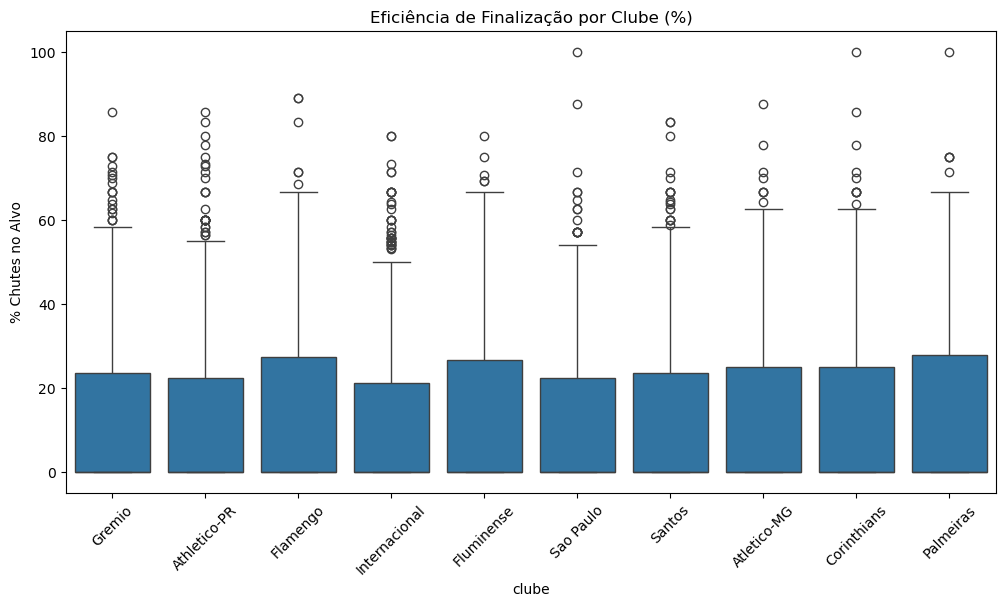

In [61]:
eficiencia = (df2_top['chutes_no_alvo'] / df2_top['chutes'] * 100).fillna(0)
plt.figure(figsize=(12,6))
sns.boxplot(data=df2_top.assign(eficiencia=eficiencia), x='clube', y='eficiencia')
plt.xticks(rotation=45)
plt.title('Eficiência de Finalização por Clube (%)')
plt.ylabel('% Chutes no Alvo')
plt.show()

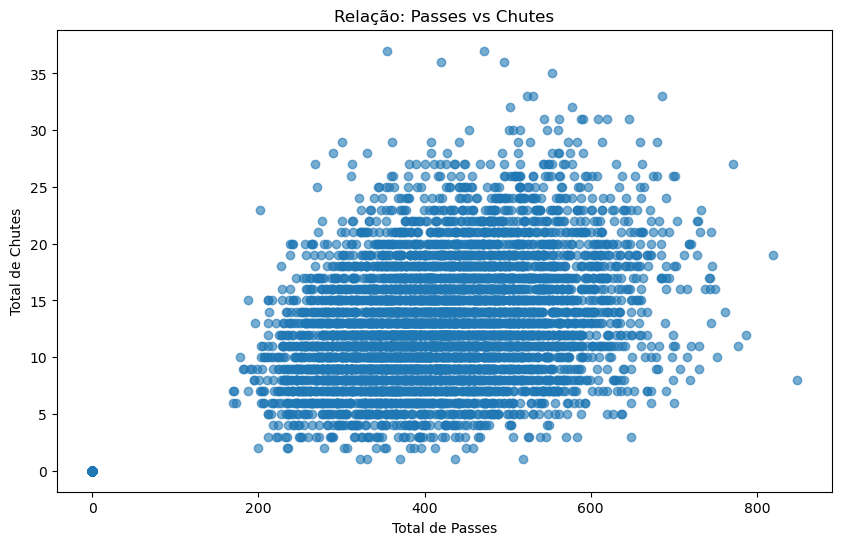

In [62]:
# Relação entre passes e chutes
plt.figure(figsize=(10,6))
plt.scatter(df2['passes'], df2['chutes'], alpha=0.6)
plt.xlabel('Total de Passes')
plt.ylabel('Total de Chutes')
plt.title('Relação: Passes vs Chutes')
plt.show()

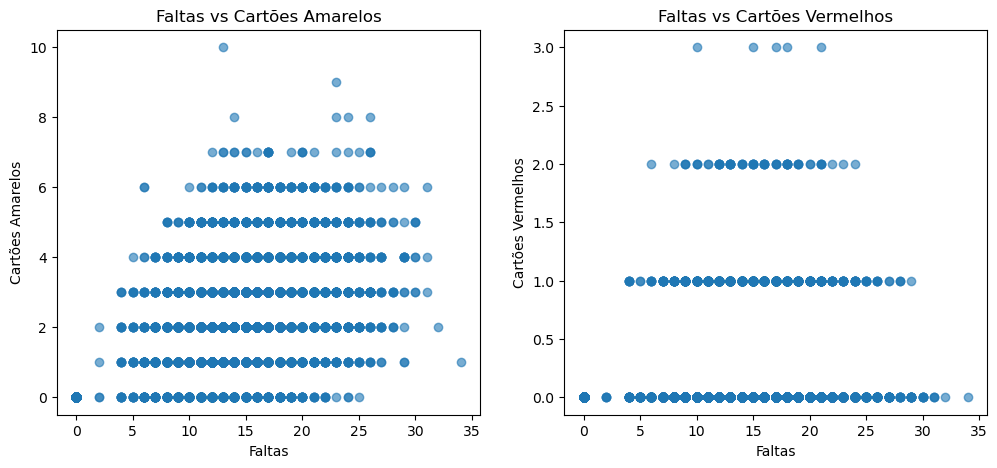

In [64]:
# Faltas vs Cartões
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df2['faltas'], df2['cartao_amarelo'], alpha=0.6)
plt.xlabel('Faltas')
plt.ylabel('Cartões Amarelos')
plt.title('Faltas vs Cartões Amarelos')

plt.subplot(1,2,2)
plt.scatter(df2['faltas'], df2['cartao_vermelho'], alpha=0.6)
plt.xlabel('Faltas')
plt.ylabel('Cartões Vermelhos')
plt.title('Faltas vs Cartões Vermelhos')
plt.show()

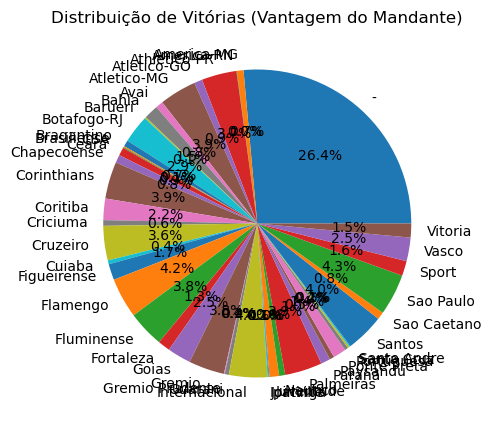

In [65]:
# Vantagem do mandante
vantagem_casa = df3.groupby('vencedor').size()
plt.figure(figsize=(8,5))
vantagem_casa.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Vitórias (Vantagem do Mandante)')
plt.show()

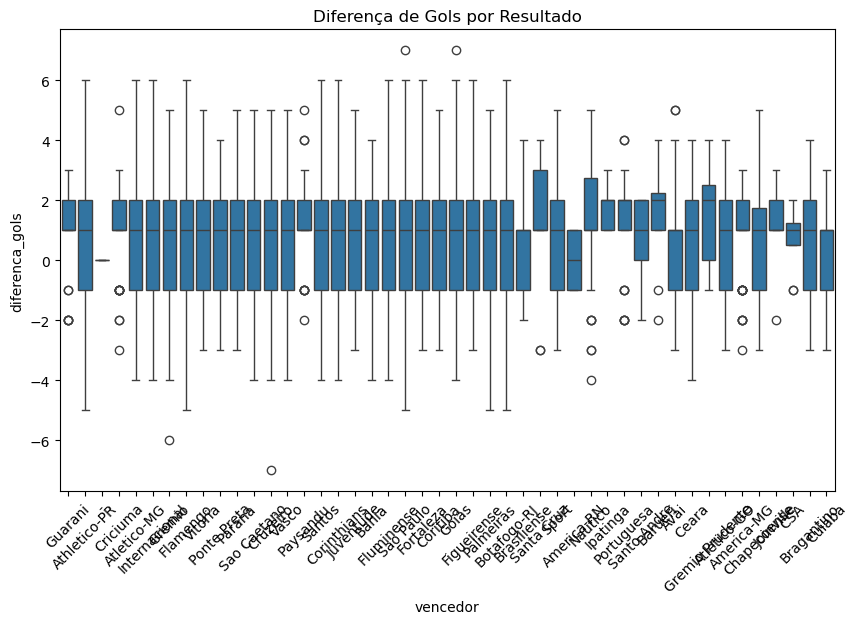

In [66]:
# Diferença de gols vs resultado
df3['diferenca_gols'] = df3['mandante_Placar'] - df3['visitante_Placar']
plt.figure(figsize=(10,6))
sns.boxplot(data=df3, x='vencedor', y='diferenca_gols')
plt.title('Diferença de Gols por Resultado')
plt.xticks(rotation=45)
plt.show()

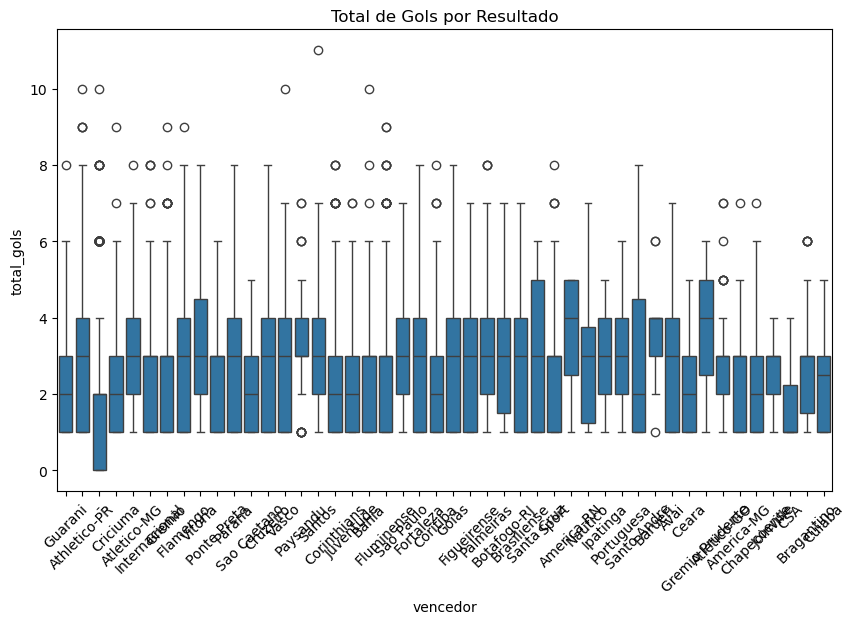

In [67]:
# Total de gols por resultado
df3['total_gols'] = df3['mandante_Placar'] + df3['visitante_Placar']
plt.figure(figsize=(10,6))
sns.boxplot(data=df3, x='vencedor', y='total_gols')
plt.title('Total de Gols por Resultado')
plt.xticks(rotation=45)
plt.show()

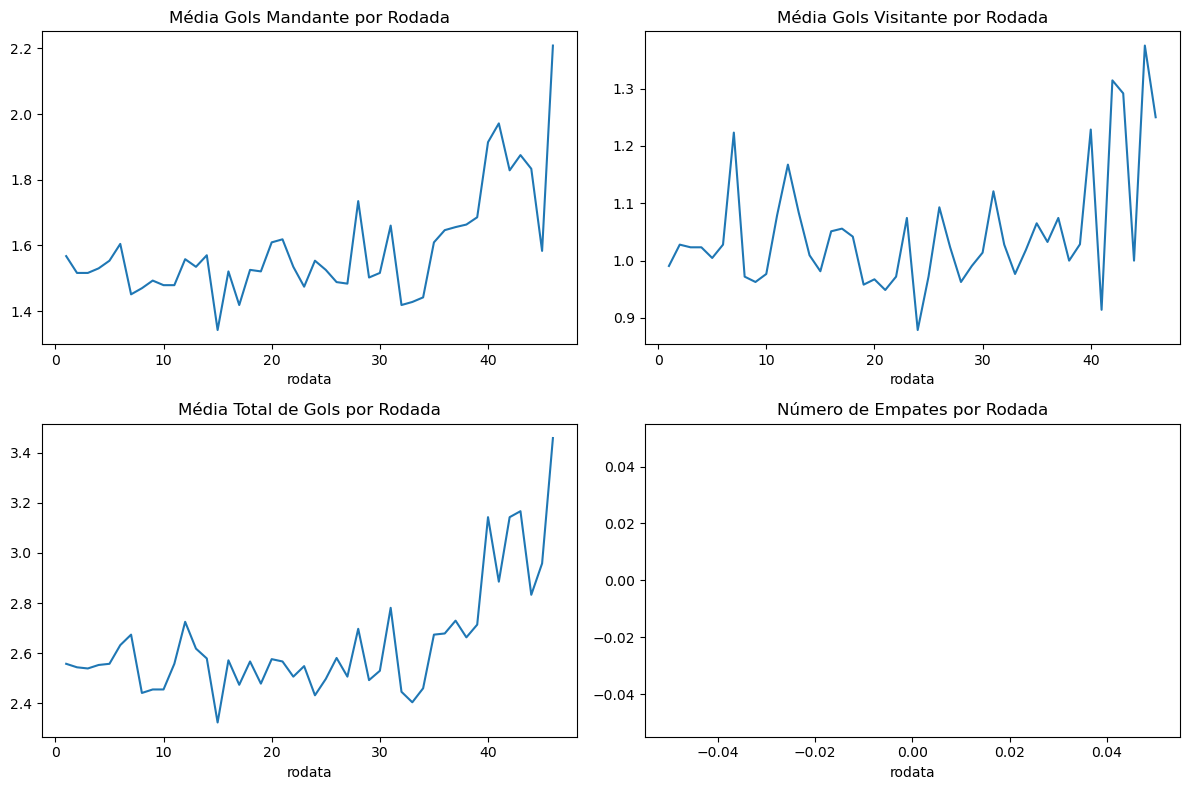

In [68]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
df3.groupby('rodata')['mandante_Placar'].mean().plot()
plt.title('Média Gols Mandante por Rodada')

plt.subplot(2,2,2)
df3.groupby('rodata')['visitante_Placar'].mean().plot()
plt.title('Média Gols Visitante por Rodada')

plt.subplot(2,2,3)
df3.groupby('rodata')['total_gols'].mean().plot()
plt.title('Média Total de Gols por Rodada')

plt.subplot(2,2,4)
empates_por_rodada = df3[df3['vencedor'] == 'Empate'].groupby('rodata').size()
empates_por_rodada.plot()
plt.title('Número de Empates por Rodada')

plt.tight_layout()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_4884\3144415790.py:2: SyntaxWarning: invalid escape sequence '\d'
  df4['minuto_num'] = pd.to_numeric(df4['minuto'].str.extract('(\d+)')[0], errors='coerce')


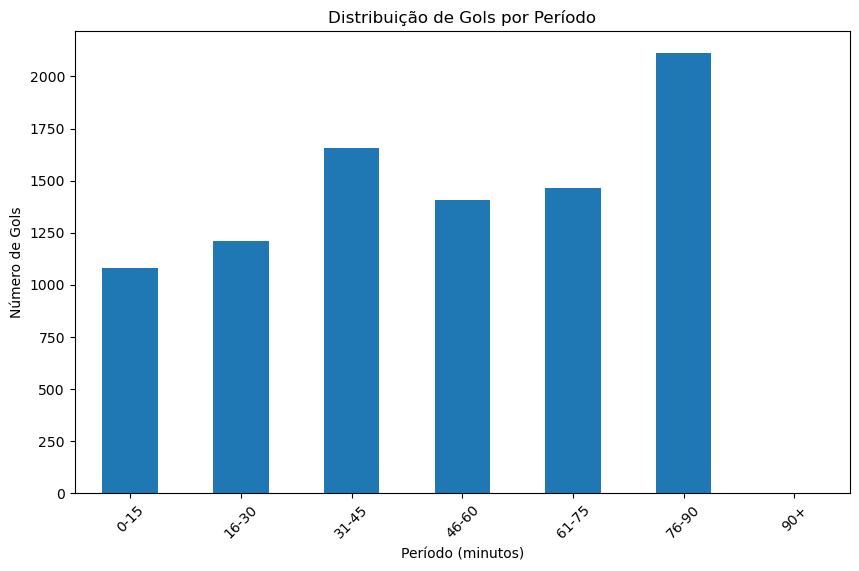

In [69]:
# Preparar dados temporais
df4['minuto_num'] = pd.to_numeric(df4['minuto'].str.extract('(\d+)')[0], errors='coerce')

# Gols por período do jogo
df4['periodo'] = pd.cut(df4['minuto_num'], 
                       bins=[0, 15, 30, 45, 60, 75, 90, 120], 
                       labels=['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '90+'])

plt.figure(figsize=(10,6))
df4['periodo'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Gols por Período')
plt.xlabel('Período (minutos)')
plt.ylabel('Número de Gols')
plt.xticks(rotation=45)
plt.show()

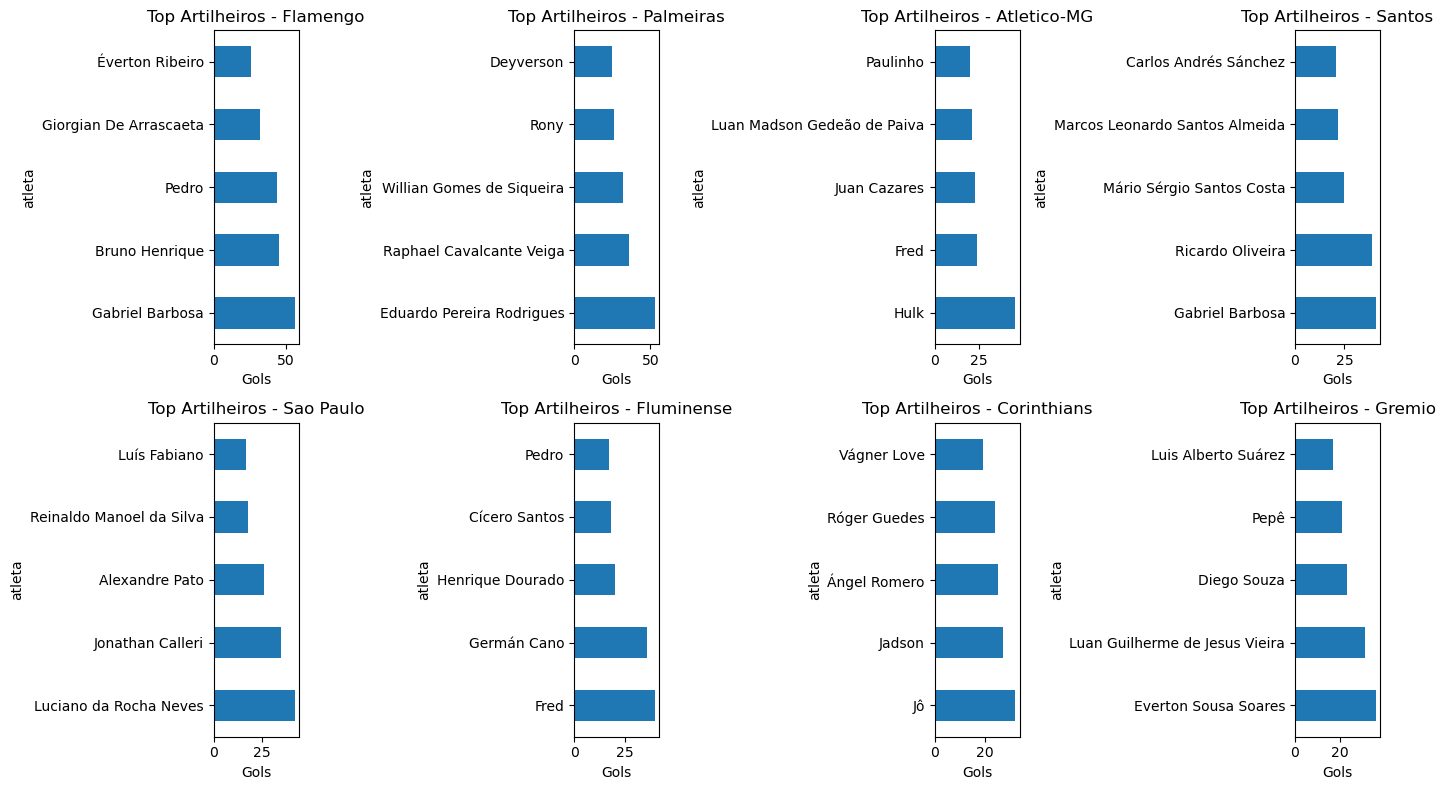

In [70]:
# Artilheiros por clube
top_clubes_gols = df4['clube'].value_counts().head(8).index
plt.figure(figsize=(14,8))
for i, clube in enumerate(top_clubes_gols):
    plt.subplot(2,4,i+1)
    clube_gols = df4[df4['clube'] == clube]['atleta'].value_counts().head(5)
    clube_gols.plot(kind='barh')
    plt.title(f'Top Artilheiros - {clube}')
    plt.xlabel('Gols')
plt.tight_layout()
plt.show()

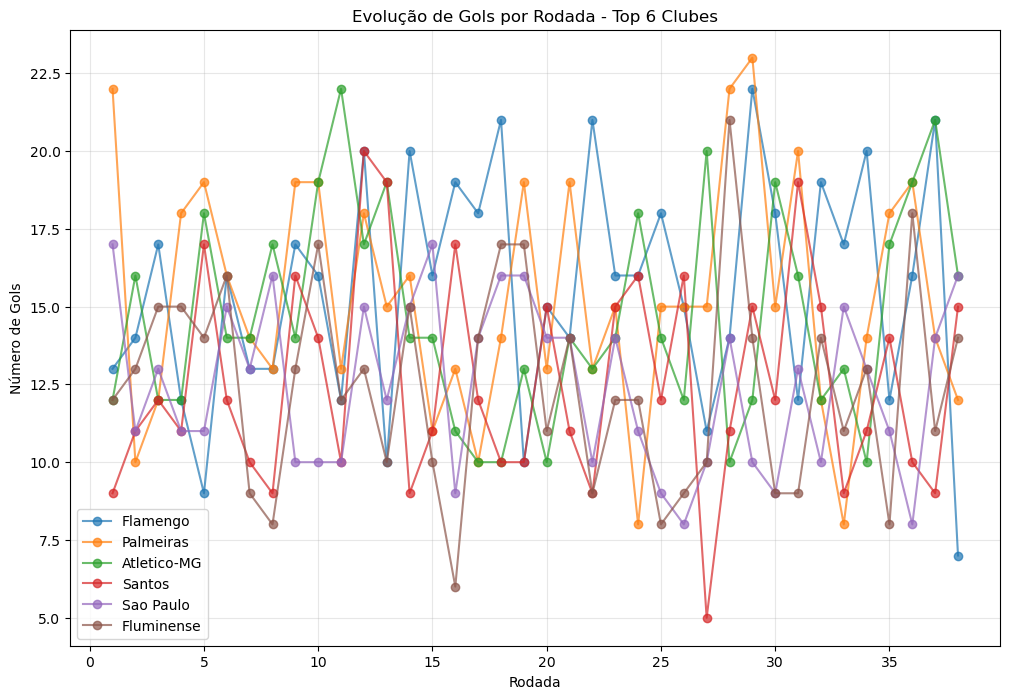

In [71]:
# Gols ao longo das rodadas por clube
plt.figure(figsize=(12,8))
for clube in df4['clube'].value_counts().head(6).index:
    gols_rodada = df4[df4['clube'] == clube].groupby('rodata').size()
    plt.plot(gols_rodada.index, gols_rodada.values, marker='o', label=clube, alpha=0.7)
plt.xlabel('Rodada')
plt.ylabel('Número de Gols')
plt.title('Evolução de Gols por Rodada - Top 6 Clubes')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Analise multivariada

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [73]:
# Preparar df2 - agregar estatísticas por partida_id
df2_agg = df2.groupby('partida_id').agg({
    'chutes': 'sum',
    'chutes_no_alvo': 'sum', 
    'passes': 'sum',
    'faltas': 'sum',
    'cartao_amarelo': 'sum',
    'cartao_vermelho': 'sum',
    'impedimentos': 'sum',
    'escanteios': 'sum'
}).reset_index()

In [74]:
# Merge partidas com estatísticas
partidas_completas = df3.merge(df2_agg, left_on='ID', right_on='partida_id', how='left')

# Adicionar contagem de gols por partida
gols_por_partida = df4.groupby('partida_id').size().reset_index(name='total_gols_eventos')
partidas_completas = partidas_completas.merge(gols_por_partida, left_on='ID', right_on='partida_id', how='left')

# Adicionar contagem de cartões por partida
cartoes_por_partida = df1.groupby('partida_id').agg({
    'cartao': 'count'
}).reset_index()
cartoes_por_partida.columns = ['partida_id', 'total_cartoes']
partidas_completas = partidas_completas.merge(cartoes_por_partida, left_on='ID', right_on='partida_id', how='left')

print(f"DataFrame consolidado criado com {partidas_completas.shape[0]} partidas e {partidas_completas.shape[1]} variáveis")

DataFrame consolidado criado com 8405 partidas e 31 variáveis


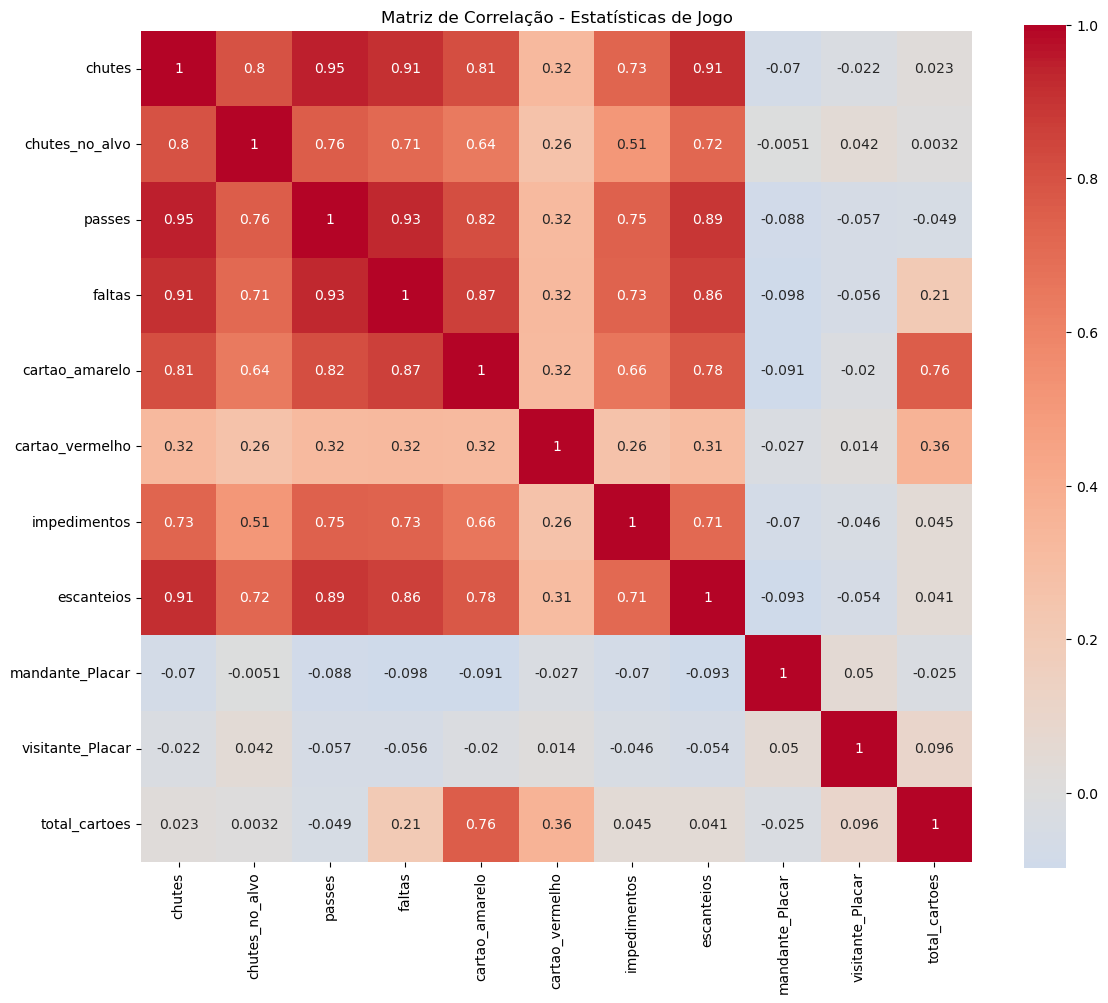

In [75]:
# 1. Matriz de Correlação das Estatísticas de Jogo
metricas_jogo = ['chutes', 'chutes_no_alvo', 'passes', 'faltas', 'cartao_amarelo', 
                 'cartao_vermelho', 'impedimentos', 'escanteios', 'mandante_Placar', 
                 'visitante_Placar', 'total_cartoes']

matriz_corr = partidas_completas[metricas_jogo].corr()

plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlação - Estatísticas de Jogo')
plt.tight_layout()
plt.show()

In [76]:
# 2. PCA - Redução de Dimensionalidade
# Preparar dados para PCA (remover NaNs)
dados_pca = partidas_completas[metricas_jogo].fillna(0)
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados_pca)

pca = PCA()
pca_result = pca.fit_transform(dados_scaled)

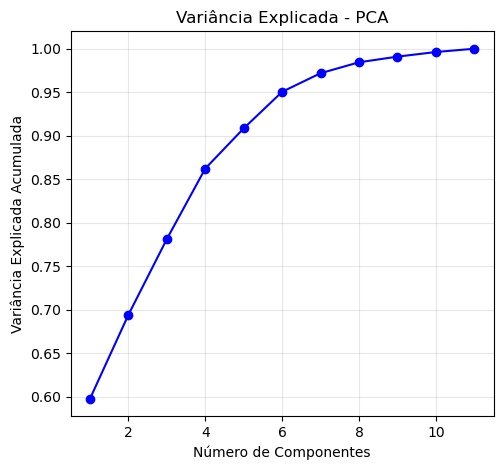

In [77]:
# Variância explicada
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada - PCA')
plt.grid(alpha=0.3)

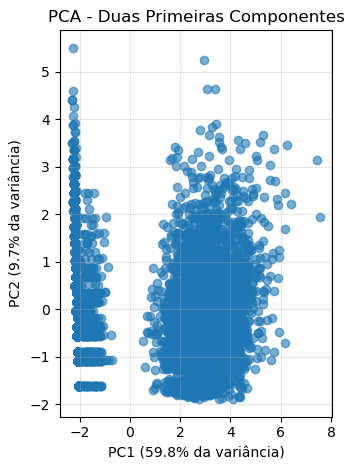

In [78]:
# Biplot dos dois primeiros componentes
plt.subplot(1,2,2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} da variância)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} da variância)')
plt.title('PCA - Duas Primeiras Componentes')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

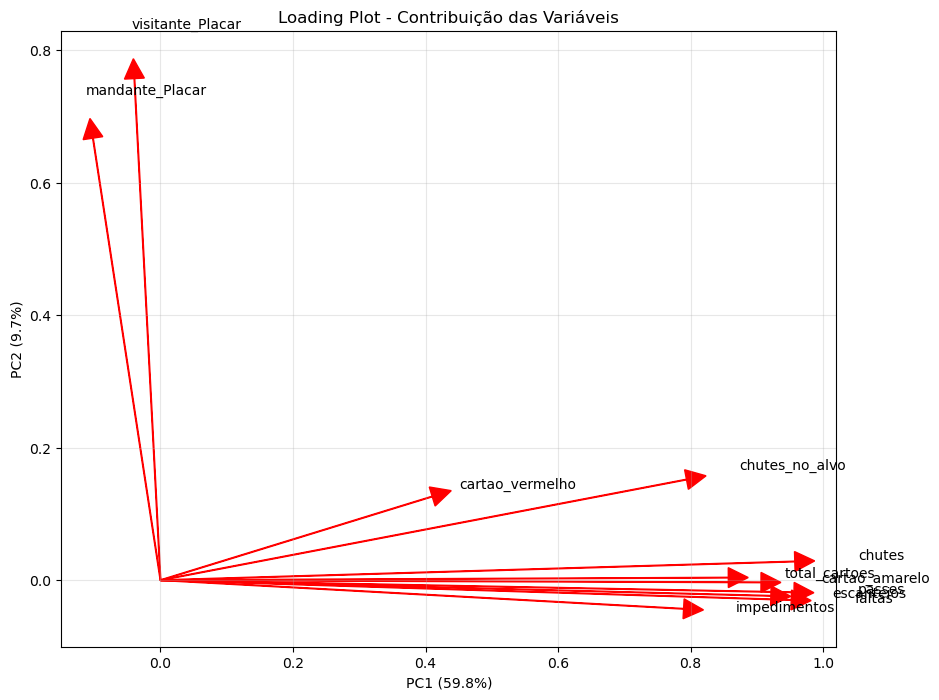

In [79]:
# Loading plot - contribuição das variáveis
loadings = pca.components_[:2].T * np.sqrt(pca.explained_variance_[:2])
plt.figure(figsize=(10,8))
for i, var in enumerate(metricas_jogo):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], 
              head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(loadings[i,0]*1.1, loadings[i,1]*1.1, var, fontsize=10)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('Loading Plot - Contribuição das Variáveis')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

In [80]:
# 3. Clustering de Partidas
# K-means clustering baseado nas estatísticas
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(dados_scaled)
partidas_completas['cluster'] = clusters

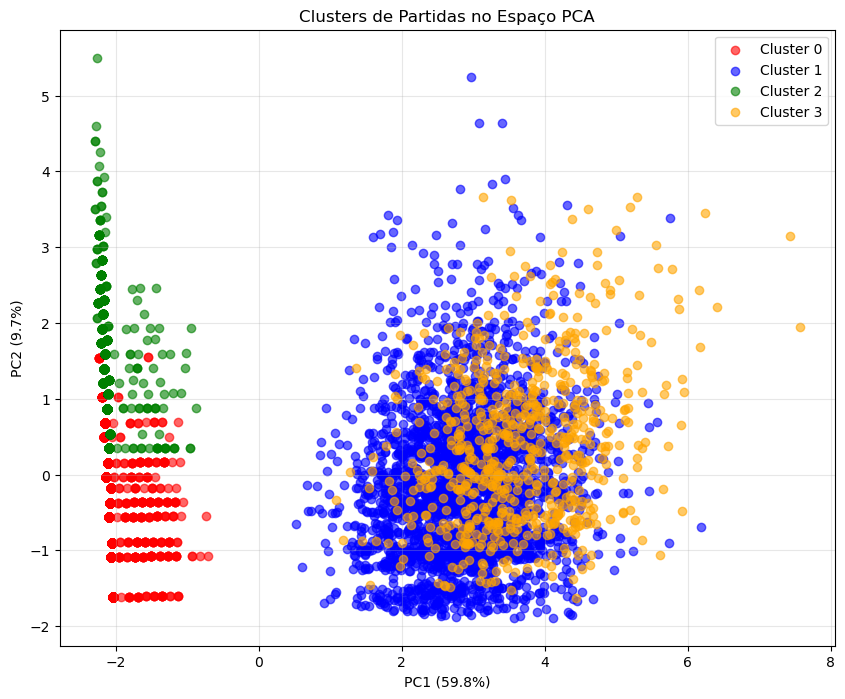

In [81]:
# Visualizar clusters no espaço PCA
plt.figure(figsize=(10,8))
cores = ['red', 'blue', 'green', 'orange']
for i in range(4):
    mask = clusters == i
    plt.scatter(pca_result[mask, 0], pca_result[mask, 1], 
                c=cores[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('Clusters de Partidas no Espaço PCA')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [82]:
# Características dos clusters
print("\nCaracterísticas dos Clusters:")
for i in range(4):
    print(f"\n--- CLUSTER {i} ---")
    cluster_data = partidas_completas[partidas_completas['cluster'] == i]
    print(f"Número de partidas: {len(cluster_data)}")
    print("Médias das principais métricas:")
    print(cluster_data[['chutes', 'chutes_no_alvo', 'passes', 'faltas', 
                       'mandante_Placar', 'visitante_Placar']].mean().round(2))



Características dos Clusters:

--- CLUSTER 0 ---
Número de partidas: 3548
Médias das principais métricas:
chutes              0.00
chutes_no_alvo      0.00
passes              0.00
faltas              0.00
mandante_Placar     1.40
visitante_Placar    0.56
dtype: float64

--- CLUSTER 1 ---
Número de partidas: 2699
Médias das principais métricas:
chutes               25.76
chutes_no_alvo        6.69
passes              848.83
faltas               29.92
mandante_Placar       1.40
visitante_Placar      0.93
dtype: float64

--- CLUSTER 2 ---
Número de partidas: 1447
Médias das principais métricas:
chutes              0.00
chutes_no_alvo      0.00
passes              0.00
faltas              0.00
mandante_Placar     2.21
visitante_Placar    2.34
dtype: float64

--- CLUSTER 3 ---
Número de partidas: 711
Médias das principais métricas:
chutes               25.95
chutes_no_alvo        6.75
passes              826.54
faltas               29.90
mandante_Placar       1.42
visitante_Placar      1.

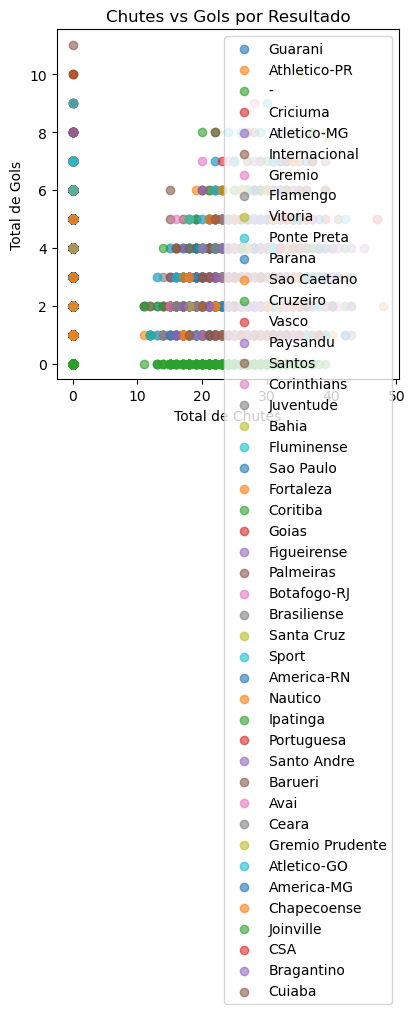

In [83]:
# 4. Análise por Resultado vs Múltiplas Variáveis
plt.figure(figsize=(15,10))

# Chutes vs Gols por resultado
plt.subplot(2,3,1)
for resultado in partidas_completas['vencedor'].unique():
    if pd.notna(resultado):
        subset = partidas_completas[partidas_completas['vencedor'] == resultado]
        plt.scatter(subset['chutes'], subset['mandante_Placar'] + subset['visitante_Placar'], 
                   label=resultado, alpha=0.6)
plt.xlabel('Total de Chutes')
plt.ylabel('Total de Gols')
plt.title('Chutes vs Gols por Resultado')
plt.legend()

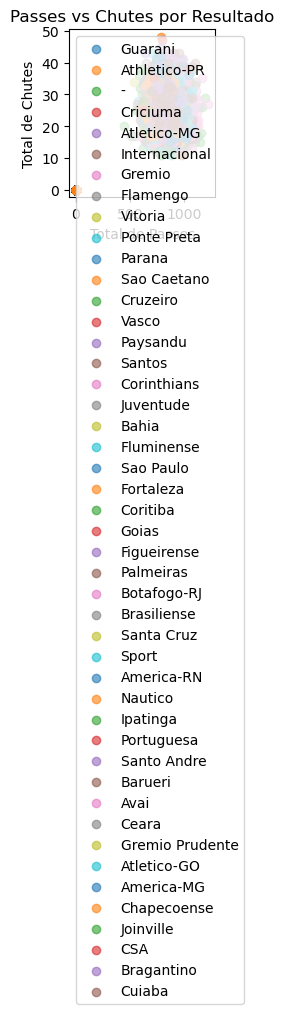

In [84]:
# Passes vs Chutes por resultado
plt.subplot(2,3,2)
for resultado in partidas_completas['vencedor'].unique():
    if pd.notna(resultado):
        subset = partidas_completas[partidas_completas['vencedor'] == resultado]
        plt.scatter(subset['passes'], subset['chutes'], 
                   label=resultado, alpha=0.6)
plt.xlabel('Total de Passes')
plt.ylabel('Total de Chutes')
plt.title('Passes vs Chutes por Resultado')
plt.legend()

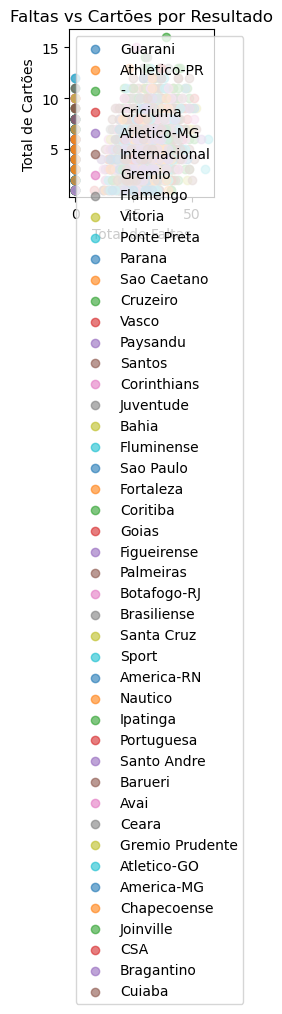

In [85]:
# Faltas vs Cartões por resultado
plt.subplot(2,3,3)
for resultado in partidas_completas['vencedor'].unique():
    if pd.notna(resultado):
        subset = partidas_completas[partidas_completas['vencedor'] == resultado]
        plt.scatter(subset['faltas'], subset['total_cartoes'], 
                   label=resultado, alpha=0.6)
plt.xlabel('Total de Faltas')
plt.ylabel('Total de Cartões')
plt.title('Faltas vs Cartões por Resultado')
plt.legend()

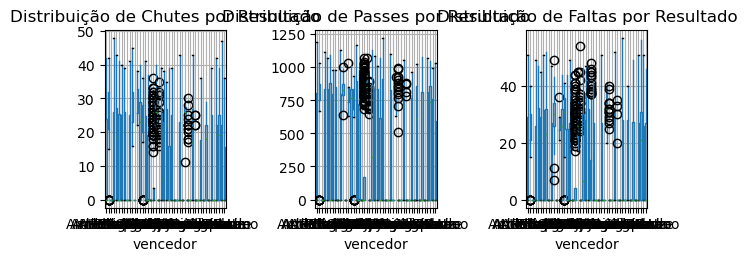

In [86]:
# Distribuições múltiplas
plt.subplot(2,3,4)
partidas_completas.boxplot(column='chutes', by='vencedor', ax=plt.gca())
plt.title('Distribuição de Chutes por Resultado')
plt.suptitle('')

plt.subplot(2,3,5)
partidas_completas.boxplot(column='passes', by='vencedor', ax=plt.gca())
plt.title('Distribuição de Passes por Resultado')
plt.suptitle('')

plt.subplot(2,3,6)
partidas_completas.boxplot(column='faltas', by='vencedor', ax=plt.gca())
plt.title('Distribuição de Faltas por Resultado')
plt.suptitle('')

plt.tight_layout()
plt.show()

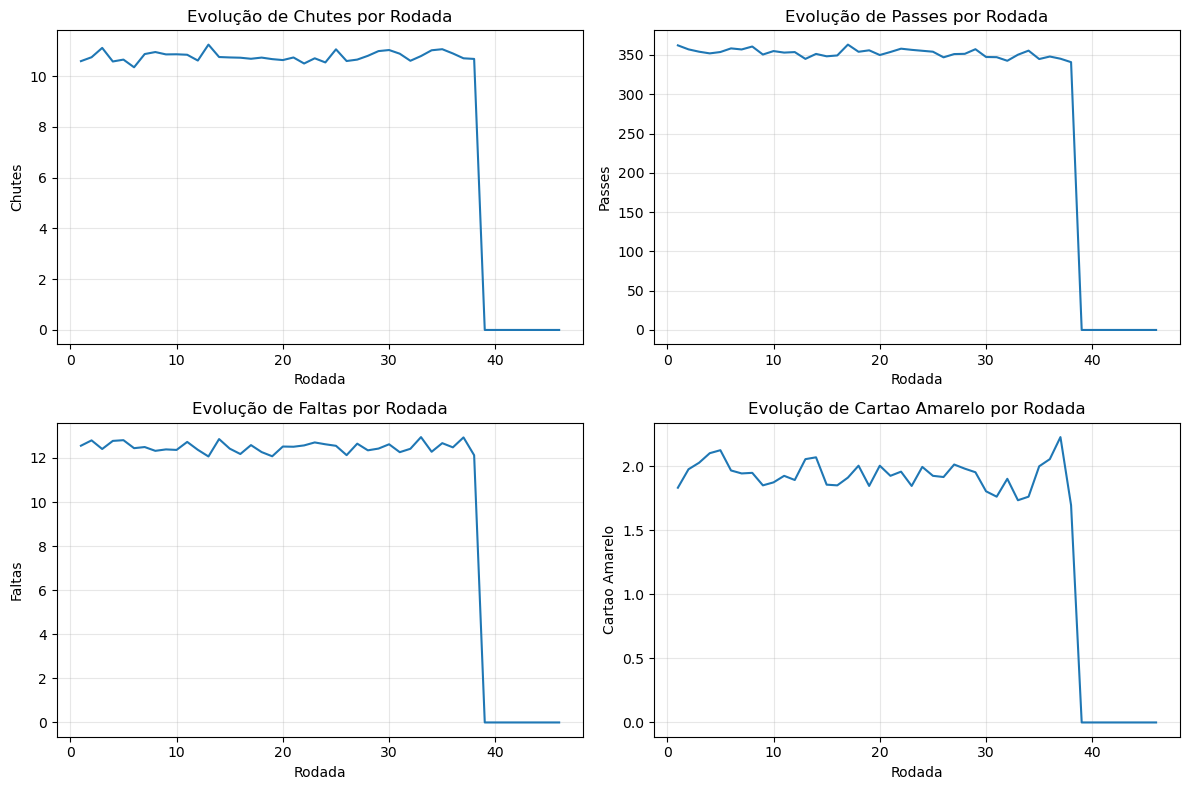

In [87]:
# 5. Análise Temporal Multivariada
# Evolução de múltiplas métricas ao longo das rodadas
metricas_evolucao = ['chutes', 'passes', 'faltas', 'cartao_amarelo']
evolucao_rodadas = partidas_completas.groupby('rodata')[metricas_evolucao].mean()

plt.figure(figsize=(12,8))
for i, metrica in enumerate(metricas_evolucao):
    plt.subplot(2,2,i+1)
    evolucao_rodadas[metrica].plot()
    plt.title(f'Evolução de {metrica.replace("_", " ").title()} por Rodada')
    plt.xlabel('Rodada')
    plt.ylabel(metrica.replace("_", " ").title())
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Análise Abrangente do Campeonato Brasileiro de Futebol

Esta análise apresenta um estudo detalhado do Campeonato Brasileiro de Futebol utilizando múltiplos conjuntos de dados que rastreiam cartões, estatísticas, resultados de partidas e gols. Vou guiá-lo através das principais descobertas e visualizações desta análise.

## Visão Geral dos Dados

A análise utiliza quatro conjuntos de dados:

- **Dados de cartões** (`campeonato-brasileiro-cartoes.csv`): Informações sobre cartões amarelos e vermelhos
- **Estatísticas de partidas** (`campeonato-brasileiro-estatisticas-full.csv`): Métricas de jogo como chutes, passes, faltas
- **Dados completos de partidas** (`campeonato-brasileiro-full.csv`): Detalhes de partidas incluindo placar, estádios, técnicos
- **Dados de gols** (`campeonato-brasileiro-gols.csv`): Informações sobre quem marcou gols e quando

A exploração inicial dos dados mostra alguns valores ausentes, particularmente no campo `posicao` (posição) do conjunto de dados de cartões (1.198 valores ausentes), no campo `num_camisa` (número da camisa) com 386 valores ausentes, e no campo `precisao_passes` (precisão de passes) no conjunto de estatísticas com 12.298 valores ausentes. Também há muitos valores ausentes em `posse_de_bola` (9.990), `formacao_mandante` (4.974), `formacao_visitante` (4.974), `tecnico_mandante` (4.610) e `tecnico_visitante` (4.610).

## Análise de Cartões

### Distribuição de Cartões por Tempo de Jogo

Uma das análises mais interessantes examina quando os cartões ocorrem durante as partidas. Os dados mostram um padrão claro:

- **Início do jogo (0-30 minutos)**:
    
    - 0-10 minutos: 399 amarelos, 13 vermelhos
    - 10-20 minutos: 949 amarelos, 19 vermelhos
    - 20-30 minutos: 1.374 amarelos, 30 vermelhos
    
    Relativamente poucos cartões, sugerindo que os árbitros tendem a ser mais tolerantes no início das partidas, buscando não influenciar o andamento prematuramente.
    
- **Final do primeiro tempo (30-45+ minutos)**:
    
    - 30-40 minutos: 1.825 amarelos, 40 vermelhos
    - 40-50 minutos: 2.326 amarelos, 79 vermelhos
    
    Aumento significativo, possivelmente refletindo o desgaste físico e a intensificação da disputa pela vantagem antes do intervalo.
    
- **Início do segundo tempo (45-60 minutos)**:
    
    - 50-60 minutos: 1.943 amarelos, 85 vermelhos
    
    Leve redução em comparação ao final do primeiro tempo, sugerindo que as equipes voltam mais cautelosas do intervalo.
    
- **Final do jogo (60-90+ minutos)**:
    
    - 60-70 minutos: 2.072 amarelos, 106 vermelhos
    - 70-80 minutos: 2.306 amarelos, 129 vermelhos
    - 80-90 minutos: 2.608 amarelos, 184 vermelhos
    - 90-100 minutos: 2.044 amarelos, 263 vermelhos
    
    Maior concentração de cartões, especialmente nos minutos finais e acréscimos, demonstrando o efeito combinado de cansaço, desespero para manter/buscar resultado, acúmulo de cartões amarelos levando a mais expulsões, e reclamações mais intensas com a arbitragem.
    

O histograma de distribuição de cartões por minuto mostra claramente este padrão crescente, com picos no final de cada tempo e um aumento dramático nos acréscimos.

### Cartões por Clube

Os 10 clubes com mais cartões:

1. Fluminense: 956 cartões
2. São Paulo: 953 cartões
3. Santos: 950 cartões
4. Internacional: 938 cartões
5. Palmeiras: 937 cartões
6. Athletico-PR: 878 cartões
7. Atlético-MG: 877 cartões
8. Flamengo: 855 cartões
9. Grêmio: 835 cartões
10. Corinthians: 788 cartões

A distribuição geral mostra significativamente mais cartões amarelos (aproximadamente 17.500) do que cartões vermelhos (aproximadamente 1.300), com uma proporção de aproximadamente 13:1. O gráfico de barras demonstra claramente esta discrepância.

### Média de Cartões por Rodada

O gráfico de linha mostrando cartões por rodada revela flutuações interessantes durante o campeonato, com algumas rodadas apresentando picos notáveis. A média parece oscilar entre 470-540 cartões por rodada, com alguns picos ultrapassando 580 cartões.

## Análise de Estatísticas de Partidas

### Análise de Chutes e Passes

Os dados revelam padrões interessantes no desempenho das equipes:

- **Melhores equipes por média de chutes**:
    
    1. Bragantino: 14,97
    2. Cuiabá: 11,67
    3. América-MG: 10,87
    4. Joinville: 10,87
    5. Chapecoense: 10,47
- **Melhores equipes por média de passes**:
    
    1. Bragantino: 421,45
    2. Cuiabá: 377,82
    3. Joinville: 349,63
    4. América-MG: 319,75
    5. CSA: 315,45

A correlação entre chutes e chutes no alvo é forte (0,771), mostrando uma relação consistente entre volume de chutes e precisão. O gráfico de dispersão ilustra claramente esta correlação positiva, com a linha de tendência mostrando que aproximadamente 26% dos chutes resultam em finalizações no alvo.

### Eficiência de Finalização

A análise de boxplot da eficiência de finalização (percentual de chutes no alvo em relação ao total de chutes) por clube mostra variações interessantes entre as equipes. Algumas equipes mantêm uma eficiência mediana de cerca de 60-70%, enquanto outras têm medianas mais baixas, por volta de 40-50%. Os outliers no gráfico (pontos isolados) representam partidas com eficiência de 100% (todos os chutes no alvo) ou 0% (nenhum chute no alvo).

### Distribuição de Vencedores

A coluna "vencedor" mostra a distribuição de vitórias:

- Empates ("-"): 2.221 partidas (26,4% do total)
- São Paulo: 365 vitórias
- Flamengo: 354 vitórias
- Santos: 340 vitórias
- Internacional: 339 vitórias
- Palmeiras: 329 vitórias
- Atlético-MG: 327 vitórias
- Corinthians: 326 vitórias

Há uma substancial vantagem para o mandante, como mostrado no gráfico de pizza "Distribuição de Vitórias", com times da casa vencendo significativamente mais vezes do que visitantes.

### Distribuição de Placares

Os histogramas de gols marcados por mandantes e visitantes mostram:

- **Mandantes**: Placar mais comum é 1 gol (aproximadamente 2.900 ocorrências), seguido por 2 gols (aproximadamente 2.100 ocorrências)
- **Visitantes**: Placar mais comum é 0 gol (aproximadamente 3.000 ocorrências), seguido por 1 gol (aproximadamente 3.000 ocorrências)

Estes dados confirmam a vantagem do mandante, com times da casa marcando mais gols em média do que visitantes.

### Arenas com Mais Jogos

As 10 arenas que mais receberam jogos:

1. Maracanã: 631 jogos
2. Mineirão: 459 jogos
3. Morumbi: 413 jogos
4. Couto Pereira: 295 jogos
5. Serra Dourada: 235 jogos
6. Orlando Scarpelli: 219 jogos
7. Pacaembu: 213 jogos
8. Estádio Raimundo Sampaio: 201 jogos
9. Beira Rio: 200 jogos
10. Vila Belmiro: 192 jogos

## Análise de Gols

### Gols por Minuto

O histograma de gols por minuto mostra padrões interessantes:

- Os gols são mais frequentes no segundo tempo
- Há um pico notável de gols nos minutos finais da partida (período de 76-90 minutos)
- O período de 31-45 minutos também tem uma alta concentração de gols
- Existem picos específicos em momentos chave: final do primeiro tempo (45'), início do segundo tempo (46') e final do jogo (90')

A distribuição por períodos confirma estas observações:

- 0-15 minutos: 1.064 gols
- 16-30 minutos: 1.211 gols
- 31-45 minutos: 1.664 gols
- 46-60 minutos: 1.418 gols
- 61-75 minutos: 1.471 gols
- 76-90 minutos: 2.025 gols
- 90+ minutos: 79 gols

### Artilheiros Principais

Os principais artilheiros no conjunto de dados:

1. Gabriel Barbosa: 97 gols
2. Fred: 81 gols
3. Diego Souza: 80 gols
4. Luciano da Rocha Neves: 64 gols
5. Bruno Henrique: 61 gols
6. Pedro: 61 gols
7. Eduardo Pereira Rodrigues: 56 gols
8. Ricardo Oliveira: 56 gols
9. Willian Gomes de Siqueira: 56 gols
10. Giorgian De Arrascaeta: 54 gols

### Clubes com Mais Gols

1. Flamengo: 590 gols
2. Palmeiras: 581 gols
3. Atlético-MG: 558 gols
4. Santos: 478 gols
5. São Paulo: 474 gols
6. Fluminense: 473 gols
7. Corinthians: 470 gols
8. Grêmio: 456 gols
9. Athletico-PR: 452 gols
10. Internacional: 431 gols

### Tipos de Gols

O conjunto de dados categoriza tipos especiais de gols:

- Pênaltis (Penalty): 859 gols
- Gols contra (Gol Contra): 230 gols

### Gols por Rodada

O gráfico de linha mostra a evolução de gols por rodada ao longo do campeonato, com uma média aproximada de 230-250 gols por rodada, mas com considerável variação. Destaca-se um pico extraordinário na rodada 31, com aproximadamente 275 gols.

### Artilheiros por Clube

A análise mostra os principais artilheiros de cada clube:

- **Flamengo**: Gabriel Barbosa (líder), Bruno Henrique, Pedro, Giorgian De Arrascaeta, Everton Ribeiro
- **Palmeiras**: Eduardo Pereira Rodrigues, Raphael Cavalcante Veiga, Willian Gomes de Siqueira, Rony, Deyverson
- **Atlético-MG**: Hulk, Fred, Jô, Luan Madson Gedeão de Paiva, Paulinho
- **Santos**: Gabriel Barbosa, Ricardo Oliveira, Marinho Sergio Santos Costa, Marcos Leonardo Santos Almeida, Carlos Andrés Sánchez

## Análise Estatística Avançada

### Matriz de Correlação

O mapa de calor mostra correlações fortes entre:

- Chutes e chutes no alvo (0,8)
- Chutes e passes (0,95)
- Chutes e faltas (0,91)
- Passes e faltas (0,93)
- Cartões amarelos e faltas (0,87)
- Impedimentos e chutes (0,73)
- Escanteios e chutes (0,91)
- Escanteios e faltas (0,86)

Interessantemente, a correlação entre cartões e placar é fraca, sugerindo que questões disciplinares não impactam fortemente o placar final. Há correlação negativa fraca entre placar do mandante e do visitante (-0,05), indicando uma leve tendência: quando um time marca mais, o outro tende a marcar menos.

### Análise de Componentes Principais (PCA)

A análise PCA revela:

- O primeiro componente explica aproximadamente 59,8% da variância
- O segundo componente explica aproximadamente 9,7% da variância
- Com 6 componentes, já se atinge 95% da variância explicada

O gráfico de loading plot mostra quais variáveis contribuem mais para cada componente principal:

- PC1 é fortemente influenciado por chutes, chutes no alvo, passes, faltas, cartões amarelos e escanteios
- PC2 é mais influenciado por placar do mandante e placar do visitante
- Isso sugere que o PC1 captura a intensidade e volume do jogo, enquanto PC2 está mais relacionado ao resultado da partida

### Análise de Clusters

A análise de K-means clustering (com 4 clusters) agrupou partidas com base em seus perfis estatísticos:

- **Cluster 0** (3.548 partidas):
    
    - Baixo em todas as métricas técnicas (chutes: 0,0, passes: 0,0, faltas: 0,0)
    - Placar moderado (mandante: 1,40, visitante: 0,56)
    - Possivelmente jogos com dados incompletos ou erro de registro
- **Cluster 1** (2.699 partidas):
    
    - Alto número de chutes (25,76) e passes (848,83)
    - Alto número de faltas (29,92)
    - Placar moderado (mandante: 1,40, visitante: 0,93)
    - Representa jogos com alta intensidade e equilíbrio técnico
- **Cluster 2** (1.447 partidas):
    
    - Baixo em todas as métricas técnicas (chutes: 0,0, passes: 0,0, faltas: 0,0)
    - Placar alto (mandante: 2,21, visitante: 2,34)
    - Possivelmente jogos com dados incompletos, mas com registro correto de placar
- **Cluster 3** (711 partidas):
    
    - Perfil similar ao Cluster 1 com alto número de chutes (25,95) e passes (826,54)
    - Alto número de faltas (29,90)
    - Placar ligeiramente mais alto (mandante: 1,42, visitante: 1,05)
    - Pode representar jogos de alta intensidade com ligeira vantagem para mandantes

A visualização dos clusters no espaço PCA mostra claramente a separação entre estes grupos, especialmente entre os clusters com dados técnicos completos (1 e 3) e os com dados incompletos (0 e 2).

## Análise Bivariada

### Chutes vs. Gols por Resultado

O gráfico de dispersão mostra a relação entre o total de chutes e o total de gols por resultado. Não há uma correlação forte visível, sugerindo que a eficiência de finalização varia consideravelmente entre as equipes e partidas.

### Passes vs. Chutes por Resultado

A relação entre passes e chutes mostra uma tendência positiva, indicando que times que controlam mais a posse (mais passes) tendem a finalizar mais. Entretanto, a dispersão é considerável, mostrando diferentes estilos de jogo.

### Faltas vs. Cartões por Resultado

O gráfico mostra uma relação positiva entre o número de faltas e o número de cartões, mas com grande variação. Alguns times recebem mais cartões para o mesmo número de faltas, possivelmente indicando diferenças na natureza das infrações ou no estilo de jogo.

## Análise Temporal

A análise temporal de métricas por rodada mostra:

- **Chutes**: Relativamente estável ao longo da temporada (média ~10 por jogo), com queda abrupta nas rodadas finais
- **Passes**: Padrão estável (média ~350 por jogo), também com queda nas rodadas finais
- **Faltas**: Consistente ao longo das rodadas (média ~12 por jogo), com o mesmo padrão de queda no final
- **Cartões Amarelos**: Variação um pouco maior entre rodadas (entre 1,5 e 2,0 por jogo)

A queda dramática em todas as métricas nas rodadas finais (após a rodada 38) possivelmente indica dados incompletos para estas rodadas ou uma mudança significativa no formato de registro dos dados.

### Evolução de Gols por Rodada - Top Clubes

O gráfico de linha mostrando a evolução de gols por rodada para os 6 principais clubes revela:

- Considerável variabilidade de desempenho ofensivo ao longo da temporada
- Alguns clubes (como Flamengo e Palmeiras) mostram picos mais elevados, chegando a mais de 20 gols em certas rodadas
- Padrões cíclicos de alta e baixa produtividade ofensiva são visíveis para todos os clubes

## Conclusão

Esta análise abrangente revela padrões fascinantes no futebol brasileiro:

1. As ações disciplinares aumentam dramaticamente à medida que as partidas progridem, com os minutos finais apresentando a maior concentração de cartões, especialmente vermelhos nos acréscimos
2. Existe uma clara vantagem para os mandantes no Campeonato Brasileiro, tanto em termos de vitórias quanto de gols marcados
3. A marcação de gols aumenta nas porções finais de cada tempo, com um pico notável nos minutos finais da partida
4. Certas equipes mostram perfis estatísticos distintivos, com clubes como Bragantino exibindo métricas técnicas elevadas (chutes e passes)
5. Existem fortes correlações entre ações técnicas (chutes, passes) e medidas disciplinares (faltas, cartões)
6. Os artilheiros principais mostram consistência notável, com Gabriel Barbosa (Gabigol) liderando por margem significativa
7. A análise de clusters revela padrões distintos de jogos, sugerindo diferentes estilos e dinâmicas de partida